# Analyze Imaging Mass Cytometry data with Squidpy

In [1]:
%matplotlib inline

In [3]:
!pip install --q squidpy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.3/148.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.3/159.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import squidpy as sq

print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
adata = sq.datasets.imc()

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


squidpy==1.6.0


  0%|          | 0.00/1.50M [00:00<?, ?B/s]

In [5]:
adata

AnnData object with n_obs × n_vars = 4668 × 34
    obs: 'cell type'
    uns: 'cell type_colors'
    obsm: 'spatial'

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


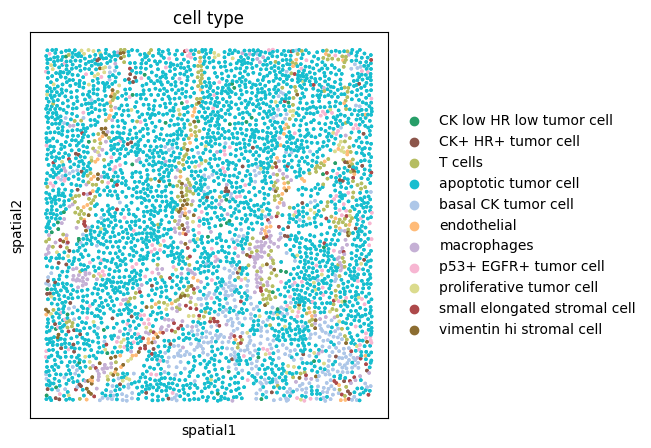

In [6]:
sq.pl.spatial_scatter(adata, shape=None, color="cell type", size=10)

  0%|          | 0/1 [00:00<?, ?/s]

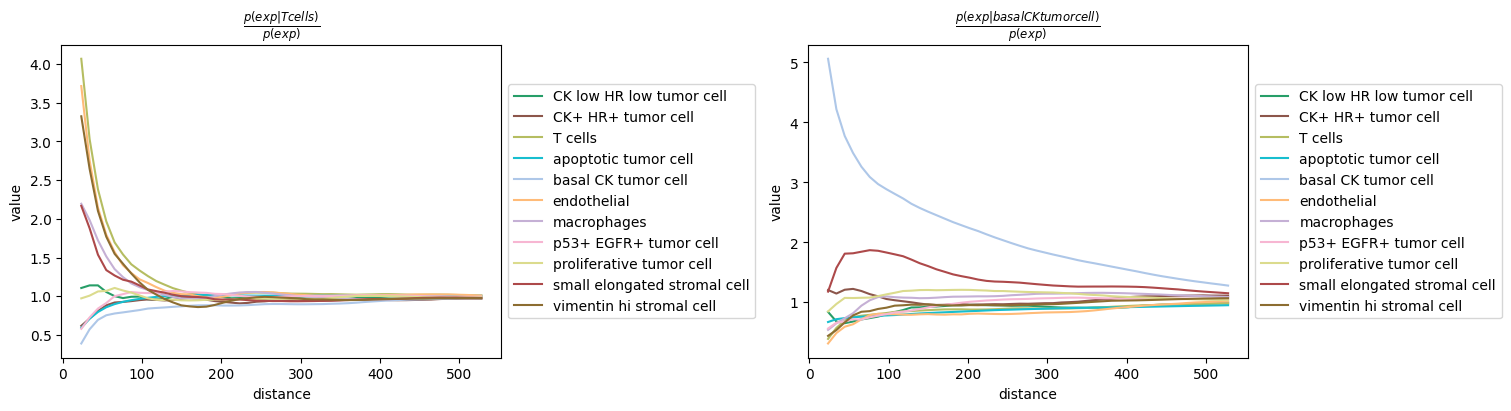

In [7]:
sq.gr.co_occurrence(adata, cluster_key="cell type")
sq.pl.co_occurrence(
    adata,
    cluster_key="cell type",
    clusters=["basal CK tumor cell", "T cells"],
    figsize=(15, 4),
)

  0%|          | 0/1000 [00:00<?, ?/s]

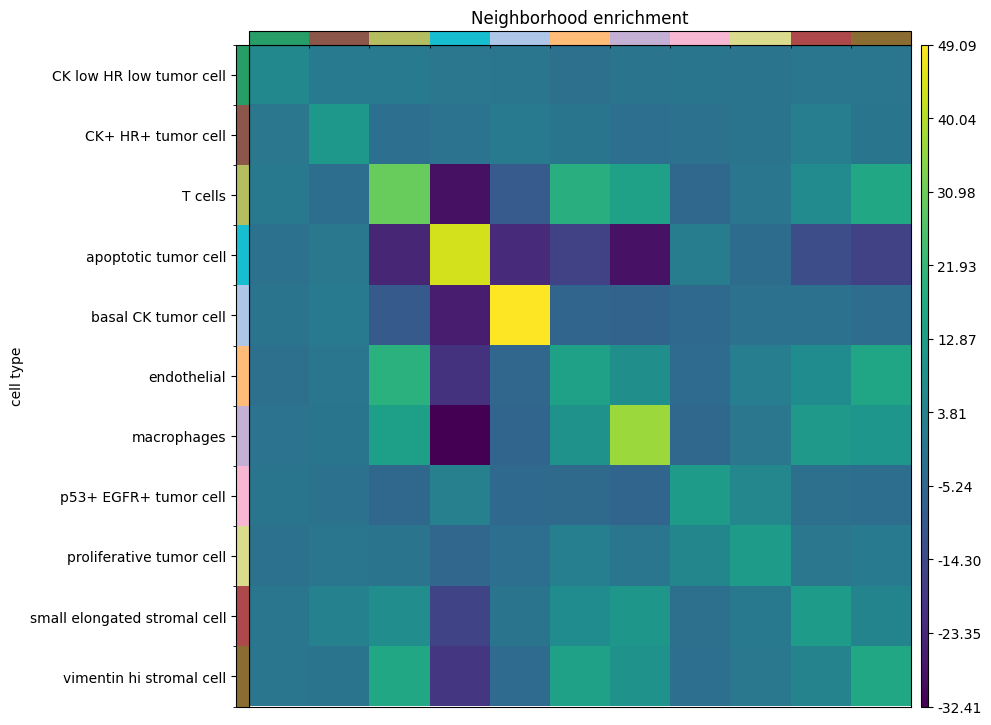

In [8]:
sq.gr.spatial_neighbors(adata)
sq.gr.nhood_enrichment(adata, cluster_key="cell type")
sq.pl.nhood_enrichment(adata, cluster_key="cell type")

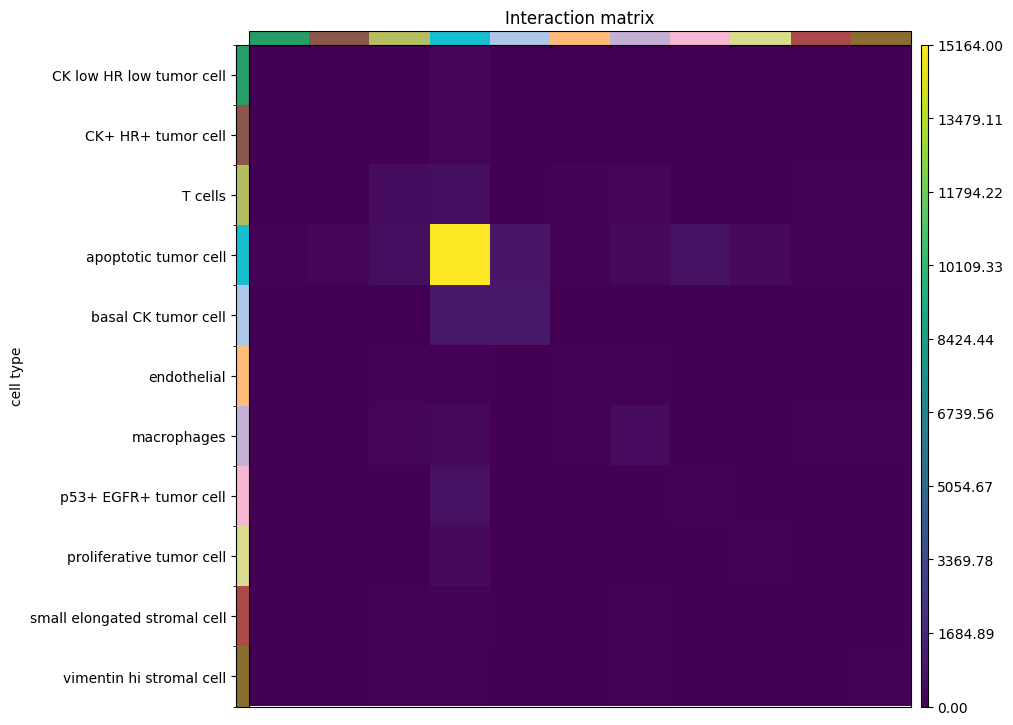

In [10]:
sq.gr.interaction_matrix(adata, cluster_key="cell type")
sq.pl.interaction_matrix(adata, cluster_key="cell type")

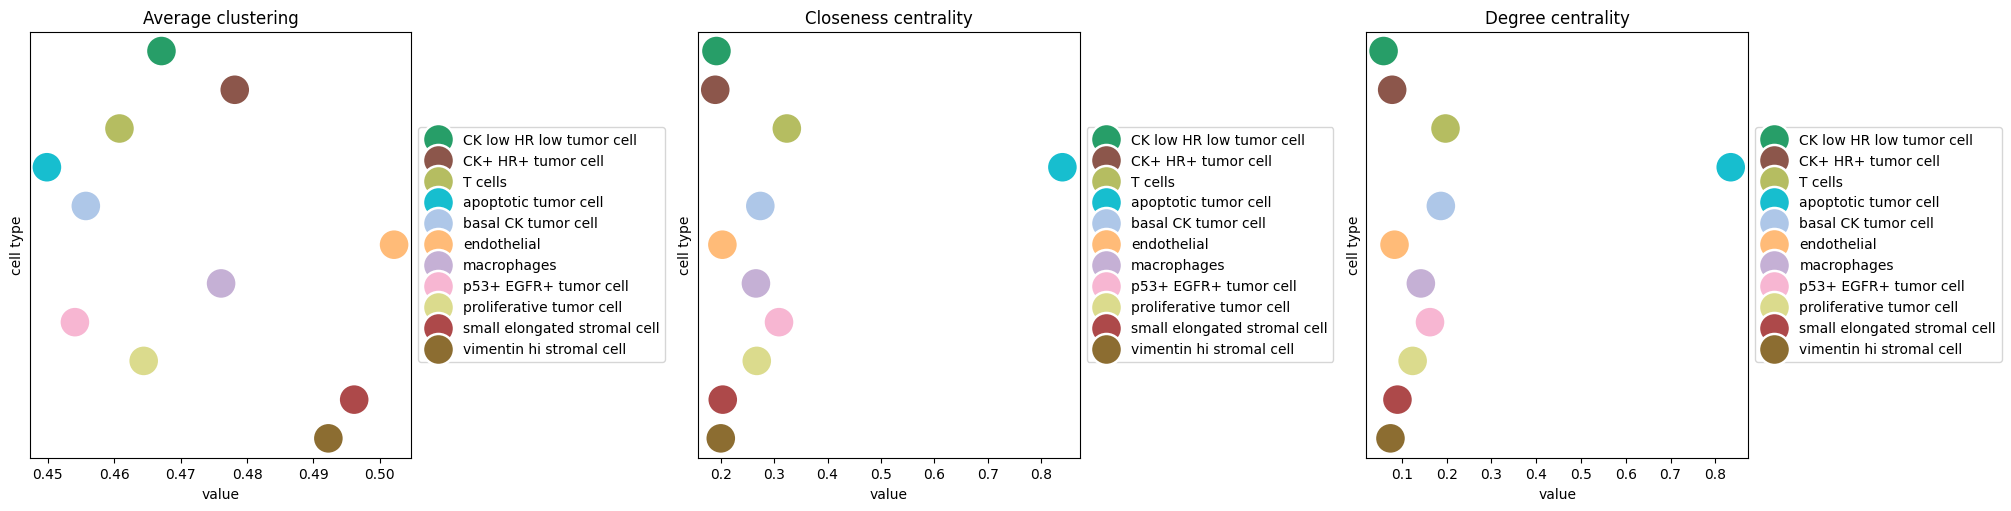

In [11]:
sq.gr.centrality_scores(
    adata,
    cluster_key="cell type",
)
sq.pl.centrality_scores(adata, cluster_key="cell type", figsize=(20, 5), s=500)

<div dir="rtl">

در تصویر بالا، انواع سلول‌های مختلف با استفاده از Mass Cytometry نمایش داده شده‌اند. این تکنیک برای شناسایی و کمی‌سازی پروتئین‌ها و دیگر مولکول‌ها در تک‌سلول‌ها استفاده می‌شود.

#### مفاهیم زیر را توضیح می‌دهیم:
**1. Co-occurrence across spatial dimensions**
   این مفهوم به هم‌زمانی و حضور هم‌زمان انواع سلول‌ها در ابعاد مکانی اشاره دارد. امتیاز هم‌زمانی به صورت زیر تعریف می‌شود:

   \[
   \frac{p(exp|cond)}{p(exp)}
   \]

   در اینجا \(p(exp|cond)\) احتمال مشاهده یک نوع سلول خاص به شرط حضور یک نوع سلول دیگر است، و \(p(exp)\) احتمال مشاهده آن نوع سلول در شعاع مورد نظر است. این امتیاز در شعاع‌های افزایش‌یابنده اطراف هر سلول در بافت محاسبه می‌شود.

#### مثال عددی برای امتیاز هم‌زمانی:
فرض کنید در یک ناحیه با شعاع خاص، احتمال مشاهده سلول T معادل 0.2 باشد (\(p(T) = 0.2\)) و احتمال مشاهده سلول B به شرط حضور سلول T معادل 0.5 باشد (\(p(B|T) = 0.5\)). امتیاز هم‌زمانی برای سلول B نسبت به سلول T به صورت زیر محاسبه می‌شود:

   \[
   \frac{p(B|T)}{p(B)} = \frac{0.5}{0.2} = 2.5
   \]

این نشان می‌دهد که حضور سلول B در نزدیکی سلول T 2.5 برابر بیشتر از حالت معمول است.

#### مقایسه‌ی مفاهیم Centrality:
**Average Clustering**: این شاخص میانگین میزان تمایل سلول‌ها به خوشه‌بندی با سلول‌های مشابه را نشان می‌دهد.
**Degree Centrality**: تعداد ارتباطات مستقیم یک سلول با دیگر سلول‌ها را نشان می‌دهد.
**Closeness Centrality**: میانگین کوتاه‌ترین فاصله یک سلول با دیگر سلول‌ها را اندازه‌گیری می‌کند و نشان‌دهنده‌ی میزان نزدیکی یک سلول به تمامی سلول‌های دیگر در شبکه است.

</div>
